## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.2962 - accuracy: 0.1488 - val_loss: 2.2351 - val_accuracy: 0.1984
Epoch 2/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.2038 - accuracy: 0.2116 - val_loss: 2.1719 - val_accuracy: 0.2265
Epoch 3/500
50000/50000 [==============================] - 5s 105us/step - loss: 2.1472 - accuracy: 0.2386 - val_loss: 2.1204 - val_accuracy: 0.2465
Epoch 4/500
50000/50000 [==============================] - 5s 96us/step - loss: 2.1005 - accuracy: 0.2577 - val_loss: 2.0773 - val_accuracy: 0.2709
Epoch 5/500
50000/50000 [==============================] - 5s 100us/step - loss: 2.0607 - accuracy: 0.2757 - val_loss: 2.0416 - val_accuracy: 0.2872
Epoch 6/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.0273 - accuracy: 0.2901 - val_loss: 2.0112 - val_accuracy: 0.2975
Epoch 7/500
50000/50000 [==============================] - 6

50000/50000 [==============================] - 5s 98us/step - loss: 1.6670 - accuracy: 0.4195 - val_loss: 1.6758 - val_accuracy: 0.4143
Epoch 56/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.6640 - accuracy: 0.4204 - val_loss: 1.6747 - val_accuracy: 0.4161
Epoch 57/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.6613 - accuracy: 0.4219 - val_loss: 1.6696 - val_accuracy: 0.4154
Epoch 58/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.6580 - accuracy: 0.4221 - val_loss: 1.6679 - val_accuracy: 0.4179
Epoch 59/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.6549 - accuracy: 0.4233 - val_loss: 1.6642 - val_accuracy: 0.4195
Epoch 60/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.6520 - accuracy: 0.4254 - val_loss: 1.6608 - val_accuracy: 0.4215
Epoch 61/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.6491 - accuracy: 0.4256 - val_loss:

Epoch 110/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.5335 - accuracy: 0.4673 - val_loss: 1.5575 - val_accuracy: 0.4531
Epoch 111/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.5316 - accuracy: 0.4664 - val_loss: 1.5584 - val_accuracy: 0.4540
Epoch 112/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.5299 - accuracy: 0.4673 - val_loss: 1.5543 - val_accuracy: 0.4548
Epoch 113/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.5279 - accuracy: 0.4681 - val_loss: 1.5594 - val_accuracy: 0.4488
Epoch 114/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.5261 - accuracy: 0.4690 - val_loss: 1.5525 - val_accuracy: 0.4561
Epoch 115/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.5242 - accuracy: 0.4694 - val_loss: 1.5525 - val_accuracy: 0.4520
Epoch 116/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.5219 - ac

50000/50000 [==============================] - 5s 100us/step - loss: 1.4435 - accuracy: 0.4972 - val_loss: 1.4932 - val_accuracy: 0.4690
Epoch 165/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.4418 - accuracy: 0.4988 - val_loss: 1.4888 - val_accuracy: 0.4739
Epoch 166/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.4398 - accuracy: 0.4994 - val_loss: 1.4868 - val_accuracy: 0.4751
Epoch 167/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.4390 - accuracy: 0.4991 - val_loss: 1.4972 - val_accuracy: 0.4685
Epoch 168/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.4377 - accuracy: 0.4993 - val_loss: 1.4902 - val_accuracy: 0.4748
Epoch 169/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.4359 - accuracy: 0.4995 - val_loss: 1.4838 - val_accuracy: 0.4746
Epoch 170/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.4345 - accuracy: 0.5013 - 

50000/50000 [==============================] - 5s 99us/step - loss: 1.3678 - accuracy: 0.5240 - val_loss: 1.4443 - val_accuracy: 0.4892
Epoch 219/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.3669 - accuracy: 0.5243 - val_loss: 1.4395 - val_accuracy: 0.4920
Epoch 220/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.3649 - accuracy: 0.5252 - val_loss: 1.4419 - val_accuracy: 0.4907
Epoch 221/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.3640 - accuracy: 0.5251 - val_loss: 1.4474 - val_accuracy: 0.4896
Epoch 222/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3622 - accuracy: 0.5260 - val_loss: 1.4418 - val_accuracy: 0.4938
Epoch 223/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.3613 - accuracy: 0.5257 - val_loss: 1.4372 - val_accuracy: 0.4920
Epoch 224/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.3601 - accuracy: 0.5255 - 

50000/50000 [==============================] - 5s 96us/step - loss: 1.3014 - accuracy: 0.5461 - val_loss: 1.4124 - val_accuracy: 0.5009
Epoch 273/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.2994 - accuracy: 0.5462 - val_loss: 1.4013 - val_accuracy: 0.4982
Epoch 274/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.2985 - accuracy: 0.5473 - val_loss: 1.4017 - val_accuracy: 0.5034
Epoch 275/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.2974 - accuracy: 0.5476 - val_loss: 1.4137 - val_accuracy: 0.4953
Epoch 276/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2963 - accuracy: 0.5470 - val_loss: 1.3980 - val_accuracy: 0.5015
Epoch 277/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2947 - accuracy: 0.5478 - val_loss: 1.4113 - val_accuracy: 0.4972
Epoch 278/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2940 - accuracy: 0.5481 - val

50000/50000 [==============================] - 5s 100us/step - loss: 1.2395 - accuracy: 0.5676 - val_loss: 1.3887 - val_accuracy: 0.5057
Epoch 327/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2391 - accuracy: 0.5663 - val_loss: 1.3886 - val_accuracy: 0.5039
Epoch 328/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.2381 - accuracy: 0.5674 - val_loss: 1.3909 - val_accuracy: 0.5008
Epoch 329/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2369 - accuracy: 0.5677 - val_loss: 1.3726 - val_accuracy: 0.5155
Epoch 330/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2360 - accuracy: 0.5692 - val_loss: 1.3759 - val_accuracy: 0.5093
Epoch 331/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.2345 - accuracy: 0.5696 - val_loss: 1.3750 - val_accuracy: 0.5158
Epoch 332/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.2333 - accuracy: 0.5692 - v

50000/50000 [==============================] - 5s 96us/step - loss: 1.1821 - accuracy: 0.5878 - val_loss: 1.3628 - val_accuracy: 0.5215
Epoch 381/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.1810 - accuracy: 0.5873 - val_loss: 1.3625 - val_accuracy: 0.5181
Epoch 382/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1794 - accuracy: 0.5889 - val_loss: 1.3732 - val_accuracy: 0.5153
Epoch 383/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.1782 - accuracy: 0.5888 - val_loss: 1.3603 - val_accuracy: 0.5204
Epoch 384/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.1779 - accuracy: 0.5885 - val_loss: 1.3605 - val_accuracy: 0.5161
Epoch 385/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.1766 - accuracy: 0.5885 - val_loss: 1.3464 - val_accuracy: 0.5245
Epoch 386/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.1747 - accuracy: 0.5892 - 

50000/50000 [==============================] - 5s 99us/step - loss: 1.1255 - accuracy: 0.6084 - val_loss: 1.3562 - val_accuracy: 0.5198
Epoch 435/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.1250 - accuracy: 0.6073 - val_loss: 1.3849 - val_accuracy: 0.5103
Epoch 436/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.1243 - accuracy: 0.6083 - val_loss: 1.3417 - val_accuracy: 0.5262
Epoch 437/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.1218 - accuracy: 0.6098 - val_loss: 1.3549 - val_accuracy: 0.5225
Epoch 438/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.1247 - accuracy: 0.6072 - val_loss: 1.3700 - val_accuracy: 0.5169
Epoch 439/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.1207 - accuracy: 0.6094 - val_loss: 1.3539 - val_accuracy: 0.5202
Epoch 440/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.1196 - accuracy: 0.6116 - val

50000/50000 [==============================] - 5s 98us/step - loss: 1.0729 - accuracy: 0.6278 - val_loss: 1.3460 - val_accuracy: 0.5256
Epoch 489/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.0686 - accuracy: 0.6300 - val_loss: 1.3392 - val_accuracy: 0.5265
Epoch 490/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.0691 - accuracy: 0.6297 - val_loss: 1.3438 - val_accuracy: 0.5267
Epoch 491/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.0692 - accuracy: 0.6284 - val_loss: 1.3620 - val_accuracy: 0.5172
Epoch 492/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.0686 - accuracy: 0.6299 - val_loss: 1.3807 - val_accuracy: 0.5168
Epoch 493/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.0677 - accuracy: 0.6298 - val_loss: 1.3754 - val_accuracy: 0.5151
Epoch 494/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.0666 - accuracy: 0.6290 - 

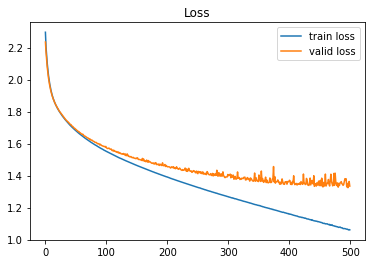

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

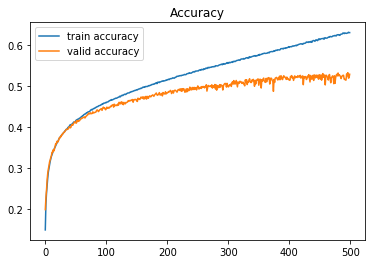

In [8]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()